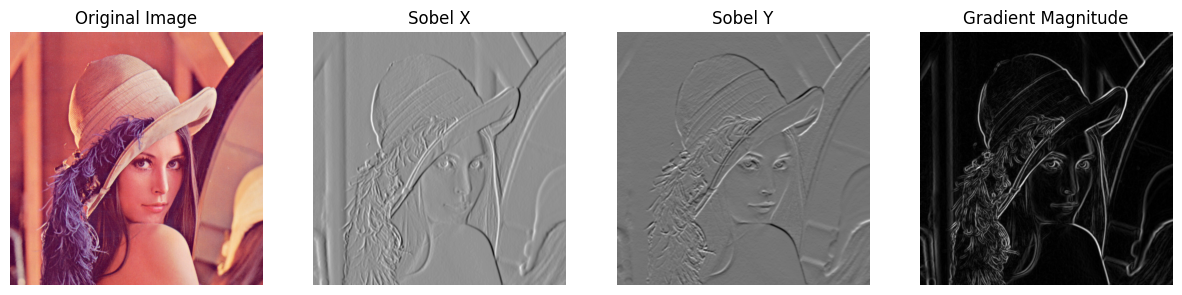

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import io

# Function to load an image from URL
def load_image_from_url(url):
    with urllib.request.urlopen(url) as response:
        img_data = response.read()
    img = Image.open(io.BytesIO(img_data))  # Load the image
    return np.array(img)

# Function to apply 2D convolution
def convolve_2d(image, kernel):
    output = np.zeros_like(image)
    padded_image = np.pad(image, pad_width=kernel.shape[0]//2, mode='edge')  # Use 'edge' padding

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(kernel * padded_image[i:i+kernel.shape[0], j:j+kernel.shape[1]])

    return output

# Generate Gaussian kernel
def gaussian_kernel(size, sigma=1.0):
    """Generates a 2D Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(
            -((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2 * sigma**2)),
        (size, size))
    return kernel / np.sum(kernel)

# Apply Gaussian smoothing
def gaussian_blur(image, kernel_size=5, sigma=1.0):
    kernel = gaussian_kernel(kernel_size, sigma)
    return convolve_2d(image, kernel)

# Function to apply Sobel X and Y detection and normalize the result
def sobel_edge_detection(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[ 1,  2,  1],
                        [ 0,  0,  0],
                        [-1, -2, -1]])

    # Apply Sobel X and Y kernels
    Gx = convolve_2d(image, sobel_x)
    Gy = convolve_2d(image, sobel_y)

    # Compute gradient magnitude from Gx and Gy
    gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

    # Normalize all images for better visual contrast
    Gx = (Gx - Gx.min()) / (Gx.max() - Gx.min()) * 255
    Gy = (Gy - Gy.min()) / (Gy.max() - Gy.min()) * 255
    gradient_magnitude = (gradient_magnitude - gradient_magnitude.min()) / (gradient_magnitude.max() - gradient_magnitude.min()) * 255

    return Gx.astype(np.uint8), Gy.astype(np.uint8), gradient_magnitude.astype(np.uint8)

# Function to display the images
def display_images(original_image, sobel_x_image, sobel_y_image, gradient_magnitude_image):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.title('Original Image')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title('Sobel X')
    plt.imshow(sobel_x_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title('Sobel Y')
    plt.imshow(sobel_y_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title('Gradient Magnitude')
    plt.imshow(gradient_magnitude_image, cmap='gray')
    plt.axis('off')

    plt.show()

# Main function to execute the pipeline
def main():
    # Load the image from the provided URL
    image_url = "https://github.com/saptarshihalder/Assignment/blob/main/lena_color_512.jpg?raw=true"
    image = load_image_from_url(image_url)  # Load the image (no grayscale conversion yet)

    # Convert the image to grayscale
    grayscale_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    # Apply Gaussian smoothing with varying kernel sizes
    kernel_size = 5  # You can change this value to experiment
    blurred_image = gaussian_blur(grayscale_image, kernel_size=kernel_size, sigma=1.0)

    # Apply Sobel edge detection for X, Y, and gradient magnitude
    sobel_x_image, sobel_y_image, gradient_magnitude_image = sobel_edge_detection(blurred_image)

    # Display the original, Sobel X, Sobel Y, and gradient magnitude images
    display_images(image, sobel_x_image, sobel_y_image, gradient_magnitude_image)

if __name__ == "__main__":
    main()
